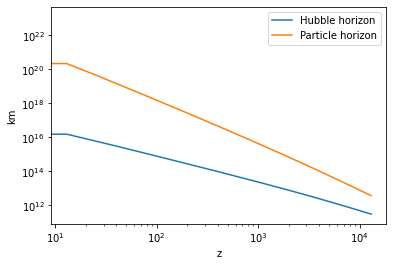

In [2]:
#In this problem we had to model, the distances in which an observer can expect in an expanding universe
#Importing all the libraries which may help in solving the problem
#numpy is for numerical operations
#Scipy is for using pre-loaded methods used in scientific operations, such as numerical differentiation and others.
import numpy as np
from scipy.optimize import curve_fit #optional
from scipy.integrate import quad
import matplotlib.pyplot as plt

#All the constants which are to be used in this exercise
omega_R_0 = 5.39e-5
omega_lambda_0 = 0.6911*(1-omega_R_0)
omega_M_0 = 0.317*(1-omega_R_0)
w_k = 1.0 - omega_M_0 - omega_lambda_0 - omega_R_0 
cosmo = {'omega_M_0':omega_M_0,'omega_lambda_0':omega_lambda_0,'omega_k_0':w_k,'omega_R_0':omega_R_0,'H0':67.34,'T0':2.7255}
fermions = {'top':[173e9,12],'bottom':[4e9,12],'charm':[1e9,12],'strange':[100e6,12],'down':[5e6,12],'up':[5e6,12],'electron':[511e3,4],'muon':[106e6,4],'tau':[1777e6,4]}
neutrinos = [0.5,2]
mp = 938e6 #Proton mass in eV
mh = 931.49432e6 #Hydrogen mass in eV
gh = 2
gp = 2
kelvin_to_eV = 8.617328e-5 #Boltzmann constant iv eV
Bh = 13.6 #eV
YHe = 0.24
h = cosmo['H0']/100
eta = 5.5e-10*((cosmo['omega_M_0']+cosmo['omega_R_0'])/0.02)*h**2
c = 2.998e5 #km s^-1
mpcToKm = 3.086e19 #km mpc^-1
G = 6.67430e-11 #m^3 kg^-1 s^-2
hbar = 6.582e-16 #ev s
jToEv = 6.242e18 #eV J^-1
secToYr = 3.171e-8
secToBillionYr = secToYr * 1e-9

#In this part of the code, I look to define a function which I will have to solve later.

def A(z):
    x = 1+z
    return np.sqrt(cosmo['omega_M_0']*x**3 + cosmo['omega_R_0']*x**4 + cosmo['omega_k_0']*x**2 + cosmo['omega_lambda_0'])

def dtdc(z):
    global c 
    return (1.0/((1+z)*cosmo['H0'])/A(z)*c)*mpcToKm 
 
#Here I get to solve the differential equation given as dtdc
def dc(z):
    return quad(dtdc,z,np.inf)[0]
def particle_horizon(z):
    return dc(z)/(1+z)
def hubble_horizon(z):
    return 1/(A(z)*cosmo['H0'])*mpcToKm

#Visualization the solution so that it be analyzed qualitatively.
to =[]
ro=[]
r = np.linspace(0,13000,num=1000)
for i in r:
    ro.append(particle_horizon(i))
    to.append(hubble_horizon(i))
ro =np.array(ro)
to = np.array(to)
plt.plot(r,to,label='Hubble horizon')
plt.plot(r,ro,label='Particle horizon')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('km')
plt.legend()
plt.show()

<ipython-input-3-59e9c7bed173>:26: RuntimeWarning: invalid value encountered in double_scalars
  a=(x**4*np.exp(x))/(1-np.exp(x))**2
<ipython-input-3-59e9c7bed173>:27: RuntimeWarning: invalid value encountered in double_scalars
  b=((x*(1+np.exp(x)))/(np.exp(x)-1)) - 4


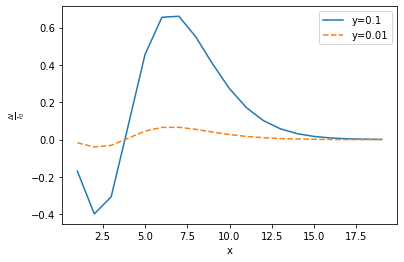

In [3]:

#In this exercise, the task was to compute plot the SZ effect for the CMB.
#Then, study the effect in which yc has on the spectrum.
#Importing useful modules.
import numpy as np
from scipy.optimize import curve_fit #optional
from scipy.integrate import quad
import matplotlib.pyplot as plt

#Constants
kelvin_to_eV = 8.617328e-5 #Boltzmann constant iv eV
omega_R_0 = 5.39e-5
omega_lambda_0 = 0.6911*(1-omega_R_0)
omega_M_0 = 0.317*(1-omega_R_0)
w_k = 1.0 - omega_M_0 - omega_lambda_0 - omega_R_0 
cosmo = {'omega_M_0':omega_M_0,'omega_lambda_0':omega_lambda_0,'omega_k_0':w_k,'omega_R_0':omega_R_0,'H0':67.34,'T0':2.7255}
c = 2.998e8 #m s^-1
mpcToKm = 3.086e19 #km mpc^-1
G = 6.67430e-11 #m^3 kg^-1 s^-2
hbar = 6.582e-16 #ev s
jToEv = 6.242e18 #eV J^-1
secToYr = 3.171e-8
secToBillionYr = secToYr * 1e-9  

#Defining the function.
def g_times_yc(x,yc):
    a=(x**4*np.exp(x))/(1-np.exp(x))**2
    b=((x*(1+np.exp(x)))/(np.exp(x)-1)) - 4
    g = a*b
    return yc*g


#Visualization of results.
#Different values of yc were used.
k=np.arange(0,20)
ans=[]
ans2=[]
for i in k:
    ans.append(g_times_yc(i,0.1))
    ans2.append(g_times_yc(i,0.01))
ans=np.array(ans)
plt.plot(k,ans,label="y=0.1")
plt.plot(k,ans2,"--",label="y=0.01")
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\frac{\Delta I}{I_0}$')
plt.show()

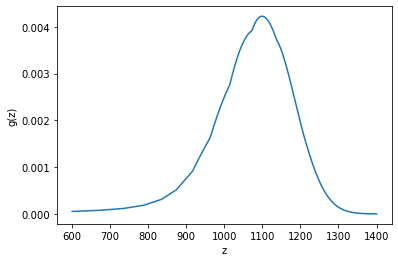

g(z) is maximized by z= 1099.0899089908992


In [3]:
#In this exercise, the task was to plot the CMB spectrum.
#A datafile was given as part of the exercise to solve the 
#Importing useful modules
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
from scipy.integrate import quad,simps
import matplotlib.pyplot as plt
from scipy.special import zeta

#Defining constants to be used
kelvin_to_eV = 8.617328e-5 #Boltzmann constant iv eV
omega_R_0 = 5.39e-5
omega_lambda_0 = 0.6911*(1-omega_R_0)
omega_M_0 = 0.317*(1-omega_R_0)
w_k = 1.0 - omega_M_0 - omega_lambda_0 - omega_R_0 
cosmo = {'omega_M_0':omega_M_0,'omega_lambda_0':omega_lambda_0,'omega_k_0':w_k,'omega_R_0':omega_R_0,'H0':67.34,'T0':2.7255}
c = 2.998e5 #km s^-1
c1 = 2.99e10 #cm s^-1
mpcToKm = 3.086e19 #km mpc^-1
G = 6.67430e-11 #m^3 kg^-1 s^-2
hbar = 6.582e-16 #ev s
jToEv = 6.242e18 #eV J^-1
secToYr = 3.171e-8
secToBillionYr = secToYr * 1e-9
YHe = 0.24
h = cosmo['H0']/100
eta = 5.5e-10*((cosmo['omega_M_0']+cosmo['omega_R_0'])/0.02)*h**2

#Uploading the data.
#Interpolation was used data so that we can estimate new data points using the given data(one can say, turning discrete data into continuous data)
data =np.loadtxt("peebles.data")
po =data[0]
xe = data[1]
val = interp1d(po,xe)

#Defining the function(differential equation) to be used.
def A(z):
    x = 1+z
    a = np.sqrt(cosmo['omega_M_0']*x**3 + cosmo['omega_R_0']*x**4 + cosmo['omega_k_0']*x**2 + cosmo['omega_lambda_0'])
    return x*a*cosmo['H0']

def dtdc(z):
    global c 
    return(1.0/(A(z)*c))*mpcToKm

def n_electrons(z):
    T = cosmo['T0']*(1+z)
    b = 2*eta*zeta(3)*(T*kelvin_to_eV)**3*(hbar*c)**(-3)*(1/np.pi**2)
    return (1-YHe)*b*val(z)

def f(z):
    sigma_T = 6.65e-25
    return ((n_electrons(z)*sigma_T)*(dtdc(z)))

#Solving the differential equation
#Here simps is used because quad was not able to solve the above differential equation.
def f1(z):
    znew = np.linspace(1,z,num = 2000)
    return simps(f(znew),znew)

def g_v(z):
    a = np.exp(-f1(z))
    b = f(z)
    return a*b

#Preparing the findings for visualisation, then visualize them.
k=[]
o=np.linspace(600,1400,num=10000)
for j in o:
    l=g_v(j)
    k.append(l)
k = np.array(k)

plt.plot(o,k)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

#PFinding the maximum value.
val2 = interp1d(k,o)
print('g(z) is maximized by z=',val2(max(k)))

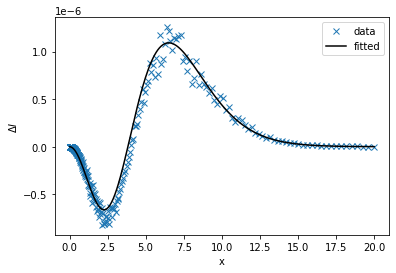

yc is = 9.501237765507806e-05


In [6]:
#Curve fitting exercise, to find yc
#Data from the Coma Cluster was used.
#x values are Temperature and y values are Brightness.
#This is similar to the code in line 3, but this is from real data not just theory.
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.integrate import quad

#constants
c = 2.998e10 #cm s^-1
c1 = 2.998e8
hp = 4.136e-15 #eV s
kelvin = 8.617328e-5 #eV K^-1
T0 = 2.73 #K
erg = 6.242e+11 #eV
me = 0.511e6 #eV
eV = 1/8065.54 #cm^-1
pc =3.086e10 #cm
I0 = 2*((kelvin*T0)**3)/((hp*c)**2) # eV cm^2 sr^-1

#Here, defining the function to fit.
def delta_intensity(x):
    a=(x**4*np.exp(x))/(1-np.exp(x))**2
    b=( (x*(1+np.exp(x)) )/(np.exp(x)-1) ) - 4
    g = a*b
    return g
def delta_I(x,yc):
    return yc*I0*delta_intensity(x) 

#Loading the data from the datafile provided
data3 = np.loadtxt("cmb_spectrum.data",unpack=True)
frequency = data3[0]*1e9  # in Hz
intensity = data3[1]  #in ergs cm^-2 sr^-1

#Modifying the data such that
xdata = (frequency*hp)/(kelvin*T0)
ydata = (intensity*erg) - (((2*hp*(frequency)**3)/c**2)*(1/(np.exp(xdata) -1))) #Note, we are looking for change in intensity


#Fitting the data to the function
#This will allow us to find the yc value
opt3,cov3 = curve_fit(delta_I,xdata,ydata)
plt.plot(xdata,ydata,linestyle='none',marker ="x",label = 'data')
plt.plot(xdata,delta_I(xdata,*opt3),"-k",label="fitted")
plt.xlabel('x')
plt.ylabel(r'$\Delta I$')
plt.legend()
plt.show()
print('yc is =',opt3[0])

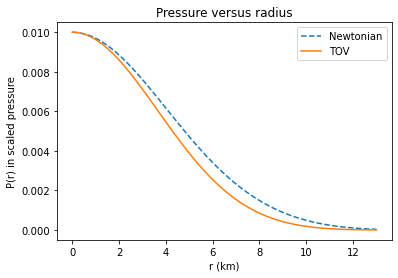

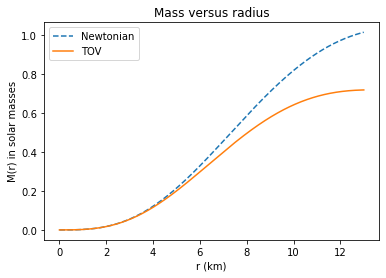

In [31]:
#In this exercise, we were to solve the TOV equations for Neutron Stars
#Importing all the modules to be used.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,solve_ivp

#Constants
ar = 2.8663  
arn = 2.4216
G = 6.67259e-11          #m^3/kg s^2
c = 3e8                  #m/s
M0 = 1.989e30            #kg
R0 = G*M0/c**2 * 0.001   #km
ga = 3/5                 #gamma
eps_0_r = 0.003006        #1/km^3

#Defining the equation, for Newtonian case
def f(y,r):
    p = y[0]
    m = y[1]
    A = arn*p**ga + ar*p
    f0 = -R0*A*m/r**2
    f1 = 4*np.pi*eps_0_r*A*r**2
    return [f0,f1]

#Defining the function, for GR corrections
def g(y,r):
    p = y[0]
    m = y[1]
    A = arn*p**ga + ar*p
    B = 1 + p/A
    C = 1 + 4*np.pi*eps_0_r*p*r**3/m
    D = 1 - 2*R0*m/r                          #B,C,D are the corrections
    g0 = - R0*A*m/r**2*B*C/D
    g1 = 4*np.pi*eps_0_r*A*r**2
    return [g0,g1]

#Solving the equation 
p0 = 0.01
m0 = 0
y0 = [p0,m0]
m1 = 1e-30
y1 =[p0,m1]
R = np.linspace(0.001,13,1000)
s= odeint(f,y0,R)
d =odeint(g,y1,R)
pans = s[:,0]
mans = s[:,1]
pans1 = d[:,0]
mans1 = d[:,1]

#Plot of Pressure vs radius
plt.plot(R,pans,label='Newtonian',linestyle='--')
plt.plot(R,pans1,label='TOV')
plt.legend()
plt.title('Pressure versus radius')
plt.xlabel('r (km)')
plt.ylabel('P(r) in scaled pressure')
plt.show()

#Plot of Mass vs radius
plt.plot(R,mans,label='Newtonian',linestyle='--')
plt.plot(R,mans1,label='TOV')
plt.legend()
plt.title('Mass versus radius')
plt.xlabel('r (km)')
plt.ylabel('M(r) in solar masses')
plt.show()